# A brief intro to Pandas

- Mainly used for handling tabular data
- We can create a Pandas DataFrame from a NumPy array, and DataFrames can be converted to NumPy arrays.

To illustrate some of the functionalities f Pandas we will use a data set with demographic and psychographic information about the drug consumption of a group of 1885 adults.

### Drug consumption (quantified) Data Set

Abstract: Classify the type of drug consumer by personality data

Number of Instances: 1885

Number of Attributes: 32

Date Donated: 2016-10-17

Original database: http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

Predict if a person is a drug consumer based on their personality data and demographics

In [1]:
# Required libraries
%matplotlib inline
import numpy as np
import pandas as pd


In [2]:
# User-defined functions

In [113]:
# Read data from csv saved in your computer
df = pd.read_csv("C:/Users/kqtt651/OneDrive - AZCollaboration/dataFrames/drugConsumption.csv", delimiter=';')
df2 = pd.read_csv("C:/Users/kqtt651/OneDrive - AZCollaboration/dataFrames/drug_consumption.data", delimiter=',') # original data
# Read data from csv saved in web page
# df = pd.read_html() 
df.head() # visualize the first rows of tha DataFrame
#df.to_csv("name.csv", index=False) # save DataFrame

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy.2,Heroin.2,Ketamine.2,Legalh.2,LSD.2,Meth.2,Mushrooms.2,Nicotine.2,Semer.2,VSA.2
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,"0,31287","-0,57545","-0,58331","-0,91699",...,NU,NU,NU,NU,NU,NU,NU,U,NU,NU
1,2,25-34,Male,Doctorate degree,UK,White,"-0,67825","1,93886","1,43533","0,76096",...,U,NU,U,NU,U,U,NU,U,NU,NU
2,3,35-44,Male,Professional certificate/ diploma,UK,White,"-0,46725","0,80523","-0,84732","-1,6209",...,NU,NU,NU,NU,NU,NU,U,NU,NU,NU
3,4,18-24,Female,Masters degree,UK,White,"-0,14882","-0,80615","-0,01928","0,59042",...,NU,NU,U,NU,NU,NU,NU,U,NU,NU
4,5,35-44,Female,Doctorate degree,UK,White,"0,73545","-1,6334","-0,45174","-0,30172",...,U,NU,NU,U,NU,NU,U,U,NU,NU


In [100]:
df.dtypes # check data types in DataFrame

1             int64
0.49788     float64
0.48246     float64
-0.05921    float64
0.96082     float64
0.12600     float64
0.31287     float64
-0.57545    float64
-0.58331    float64
-0.91699    float64
-0.00665    float64
-0.21712    float64
-1.18084    float64
CL5          object
CL2          object
CL0          object
CL2.1        object
CL6          object
CL0.1        object
CL5.1        object
CL0.2        object
CL0.3        object
CL0.4        object
CL0.5        object
CL0.6        object
CL0.7        object
CL0.8        object
CL0.9        object
CL0.10       object
CL2.2        object
CL0.11       object
CL0.12       object
dtype: object

In [114]:
# Rename columns

# List of new names
new_names = ["ID","Age","Gender","Education", "Country","Ethnicity", "Nscore", "Escore","Oscore", "Ascore", "Cscore", "Impulsive","SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

# Rename columns
df.rename(columns = dict(zip(df.columns[0:], new_names)), inplace = True)
df.head()


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy.2,Heroin.2,Ketamine.2,Legalh.2,LSD.2,Meth.2,Mushrooms.2,Nicotine.2,Semer.2,VSA.2
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,"0,31287","-0,57545","-0,58331","-0,91699",...,NU,NU,NU,NU,NU,NU,NU,U,NU,NU
1,2,25-34,Male,Doctorate degree,UK,White,"-0,67825","1,93886","1,43533","0,76096",...,U,NU,U,NU,U,U,NU,U,NU,NU
2,3,35-44,Male,Professional certificate/ diploma,UK,White,"-0,46725","0,80523","-0,84732","-1,6209",...,NU,NU,NU,NU,NU,NU,U,NU,NU,NU
3,4,18-24,Female,Masters degree,UK,White,"-0,14882","-0,80615","-0,01928","0,59042",...,NU,NU,U,NU,NU,NU,NU,U,NU,NU
4,5,35-44,Female,Doctorate degree,UK,White,"0,73545","-1,6334","-0,45174","-0,30172",...,U,NU,NU,U,NU,NU,U,U,NU,NU


In [98]:
# df['Age'].abs() # take absolute values of a column
# df['Age'] = df['Age'].abs() # take absolute values of a column and replace the original values
#df.loc[:,'Age']*= -1 # multiply the column with a number

In particular this dataframe has some *float* values instead of categorical data in columns: age, gender, Education, and Country. We can change those values to some given coding.
The different values and their meanings are available on the web page where we downlad the data.

In [110]:
# Age
age_groups = {"Age": {-0.9519700000000001: "18-24",
                           -0.07854:"25-34",
                           0.49788000000000004:"35-44",
                           1.09449:"45-54",
                           1.82213:"55-64",
                           2.59171: "65+" }}

df2.replace(age_groups, inplace=True)
df2.head()


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [115]:
print(df.shape)   # dimensions of the DataFrame
print(df.size)    # rows * columns
print(len(df))    # number of rows
print(df.columns) # shows the columns names

(1877, 70)
131390
1877
Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA', 'Alcohol.1', 'Amphet.1', 'Amyl.1',
       'Benzos.1', 'Caff.1', 'Cannabis.1', 'Choc.1', 'Coke.1', 'Crack.1',
       'Ecstasy.1', 'Heroin.1', 'Ketamine.1', 'Legalh.1', 'LSD.1', 'Meth.1',
       'Mushrooms.1', 'Nicotine.1', 'Semer.1', 'VSA.1', 'Alcohol.2',
       'Amphet.2', 'Amyl.2', 'Benzos.2', 'Caff.2', 'Cannabis.2', 'Choc.2',
       'Coke.2', 'Crack.2', 'Ecstasy.2', 'Heroin.2', 'Ketamine.2', 'Legalh.2',
       'LSD.2', 'Meth.2', 'Mushrooms.2', 'Nicotine.2', 'Semer.2', 'VSA.2'],
      dtype='object')


In [116]:
df['Age'].unique() 

array(['35-44', '25-34', '18-24', '65+', '45-54', '55-64'], dtype=object)

In [117]:
df['Age']      # Extract a single column
df['Age'][:5]  # Extract the first 5 elements of that row
df['Age'][2]   # Extract the fifth element of that row

'35-44'

In [118]:
df[['Age', 'Gender']][:5] # Extract the first 5 elements of two selected rows

,Age,Gender
0,35-44,Female
1,25-34,Male
2,35-44,Male
3,18-24,Female
4,35-44,Female


In [119]:
df.sort_values(['Age']) # Sort the DataFrame by a specific column

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy.2,Heroin.2,Ketamine.2,Legalh.2,LSD.2,Meth.2,Mushrooms.2,Nicotine.2,Semer.2,VSA.2
938,944,18-24,Female,"Some college or university, no certificate or ...",USA,Mixed-White/Asian,"1,60383","-0,80615","0,58331","0,43852",...,U,U,NU,NU,U,U,U,NU,NU,NU
954,960,18-24,Female,University degree,Other,White,"0,04257","0,16767","1,43533","1,11406",...,NU,NU,NU,NU,NU,U,NU,U,NU,NU
956,962,18-24,Male,Professional certificate/ diploma,Australia,White,"0,31287","0,96248","1,06238","0,28783",...,U,NU,U,U,U,NU,NU,U,NU,NU
959,965,18-24,Male,"Some college or university, no certificate or ...",USA,White,"-0,92104","1,2861","-0,45174","0,76096",...,U,NU,NU,U,U,NU,U,U,NU,NU
961,967,18-24,Male,Masters degree,UK,White,"-0,92104","1,11406","-0,01928","0,28783",...,U,NU,U,U,U,NU,U,U,NU,U
962,968,18-24,Female,"Some college or university, no certificate or ...",USA,White,"-0,58016","0,32197","0,58331","1,11406",...,NU,NU,NU,U,NU,U,U,U,NU,U
963,969,18-24,Female,"Some college or university, no certificate or ...",USA,White,"-0,24649","0,16767","1,88511","1,45039",...,U,NU,NU,U,U,NU,U,U,NU,U
964,970,18-24,Male,"Some college or university, no certificate or ...",USA,Black,"-1,55078","1,2861","1,06238","-1,47955",...,NU,NU,NU,U,NU,NU,U,U,NU,NU
968,974,18-24,Male,"Some college or university, no certificate or ...",USA,White,"1,49158","-1,23177","-1,11902","0,13136",...,U,NU,U,NU,U,U,U,U,NU,NU
969,975,18-24,Male,"Some college or university, no certificate or ...",USA,White,"-1,86962","2,127","1,24033","1,45039",...,U,NU,NU,U,U,NU,U,U,NU,NU


In [120]:
country_counts = df['Country'].value_counts()
country_counts

UK                     1044
USA                     551
Other                   118
Canada                   87
Australia                52
Republic of Ireland      20
New Zealand               5
Name: Country, dtype: int64

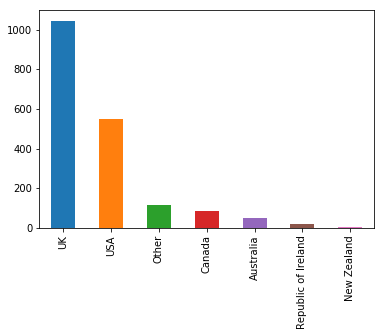

In [121]:
country_counts.plot(kind='bar')